In [1]:
import numpy as np
import pandas as pd
import keras
import keras.backend as kb
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model






Please install GPU version of TF


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 2)                 14        
                                                                 
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________
None


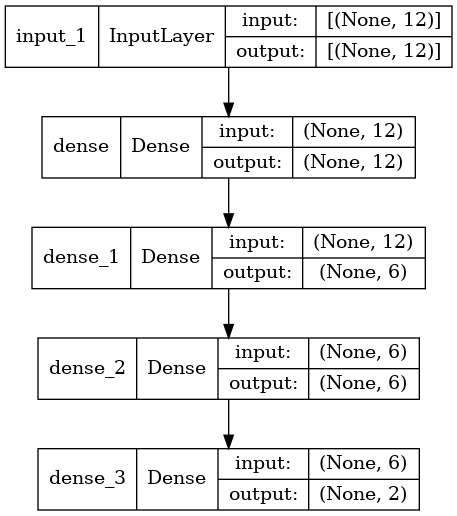

In [2]:

model = keras.Sequential()
model.add(keras.Input(shape=(12,)))

model.add(keras.layers.Dense(12, activation="tanh"))

#model.add(keras.layers.Dense(12, activation="tanh"))
model.add(keras.layers.Dense(6, activation="relu"))
model.add(keras.layers.Dense(6, activation="relu"))
model.add(keras.layers.Dense(2))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error',optimizer=optimizer)
print(model.summary())
plot_model(model, to_file="cfl_net.png", show_shapes=True)

0.9999354933609014 7.594047903921819e-05
1.0000000000000002 0.0


array([[0.63982594, 0.68519323],
       [0.28254161, 0.25621184],
       [0.32181771, 0.52619722],
       ...,
       [0.02028984, 0.53361518],
       [0.54102692, 0.67101974],
       [0.86001802, 0.7427644 ]])

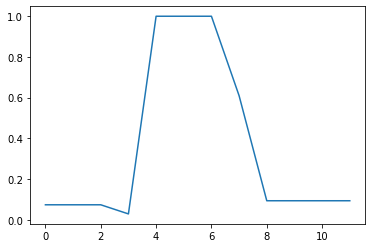

In [3]:


data=np.load('skylut.npz')
lut=data['lut']

big_pixel_area = 9.6685

X,Y=lut[:,2:],lut[:, 0:2]


Y=(Y+1800)/3600.

X=X/big_pixel_area


fig=plt.figure()
plt.plot(X[100])
print(np.max(Y), np.min(Y))
print(np.max(X), np.min(X))


Y


In [ ]:
history=model.fit(X,Y, epochs=4, validation_split = 0.1, batch_size = 20)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

Epoch 1/4
 4958/22500 [=====>........................] - ETA: 16s - loss: 9.1654e-04

In [ ]:
model.save('skylut_ML_model.h5')  # creates a HDF5 file 'my_model.h5'


In [ ]:
history.history

In [ ]:
import sys
sys.path.append('.')
sys.path.append('..')
import numpy as np
import math
from core import stix_cfl
import matplotlib.pyplot as plt
from shapely import speedups
speedups.enable()
from multiprocessing import Process
import time
import pickle

cfl=stix_cfl.CFL()
R_SUN=1800
num=10
rho = np.sqrt(np.random.uniform(0, 1, num))
phi = np.random.uniform(0, 2*np.pi, num)
sun_X = R_SUN * rho* np.cos(phi)
sun_Y = R_SUN*rho* np.sin(phi)
sun_XY=np.vstack((sun_X,sun_Y)).T

patterns=np.array([cfl.get_pattern(x,y)['pattern'] for x,y in zip(sun_X,sun_Y)])

testX=patterns/big_pixel_area

testY=model.predict(testX)
testY_real=testY*3600-1800


In [ ]:
testY_real

In [ ]:
sun_XY

In [ ]:
(sun_XY-testY_real)